In [1]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sample_images = pd.read_csv("csvs/sample_images.csv", sep="\t")
sample_images.drop([c for c in sample_images.columns if "Unnamed" in c], inplace=True, axis=1)
sample_images.head()

,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1
1,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31
2,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201
3,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401
4,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601


In [3]:
#divide images into fronts and back, and turn them into separate dataframes
x = sample_images.image.str.rpartition('_')
x = x[2].str.split('.', expand=True)
even_edges = sample_images.iloc[x.loc[x[0].astype('int64') % 2 ==0 ].index].copy()
odd_edges = sample_images.iloc[x.loc[x[0].astype('int64') % 2 !=0 ].index].copy()
even_edges.head()
# there are not many card backs in this file; we'll remediate that later. First we go with the card fronts

,im_nr,imnm,kaart_nr,map,edges,image,imnr
6,30_0064,64,76c99c72-e8eb-102c-b6de-005056a23d00,30,1977,NL-HaNA_2.05.159_30_0064.jpg,64


In [4]:
odd_edges["edges"] = odd_edges.edges.astype("int64", inplace=True)

In [ ]:
d_o = odd_edges.edges.value_counts()

/Users/rikhoekstra/anaconda/envs/36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/Users/rikhoekstra/anaconda/envs/36/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


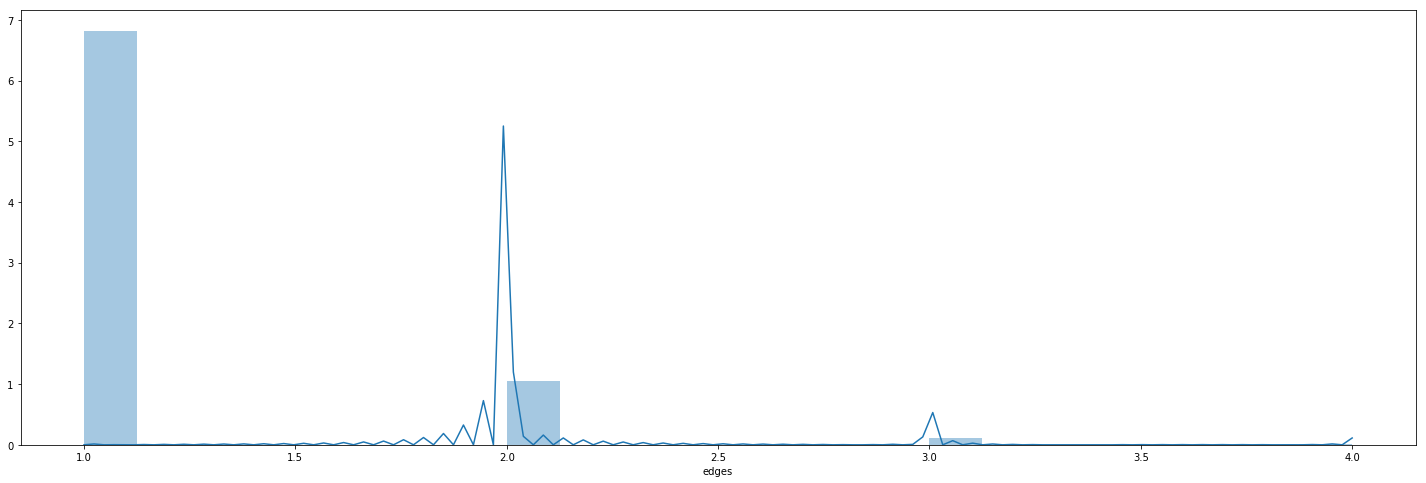

In [6]:
fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(111)
sns.distplot(d_o, ax=ax1)
#but the number of values is too small. So we try classifying them

In [7]:
#these cut values come from the previous notebook
odd_cuts = [0, 200, 800, 1200, 1600, 2000, even_edges.edges.max()]
even_cuts = [0, 200, 400, 800, 1600, 2500, even_edges.edges.max()]
labelled = ['empty','small', 'medium-sm','medium-l','large','dense']

In [8]:
fronts = pd.cut(odd_edges.edges, [0, 800, 1100, 1450, 1950, odd_edges.edges.max()],
               labels=['empty','small', 'medium','large','dense']).value_counts()
fronts.sort_index(inplace=True)
fronts

empty      92
small     133
medium    167
large     168
dense     128
Name: edges, dtype: int64

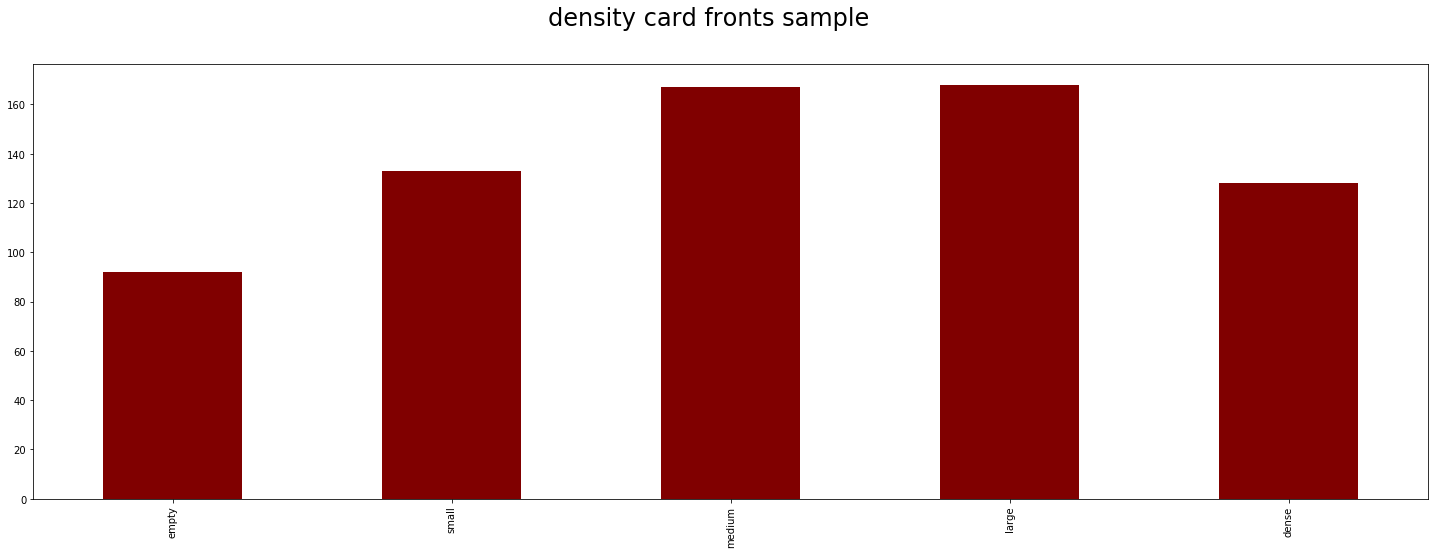

In [9]:
fig = plt.figure(figsize=(25, 8))
fig.suptitle("density card fronts sample", fontsize="24")
ax1 = fig.add_subplot(111)
fronts.sort_index().plot.bar(color='maroon', ax=ax1)

In [10]:
odd_edges['density'] = pd.cut(odd_edges.edges, [0, 800, 1100, 1450, 1950, odd_edges.edges.max()],
               labels=['empty','small', 'medium','large','dense'])
odd_edges['url'] = odd_edges["map"].apply(lambda x: "https://migrantcards.huygens.knaw.nl/cards/%(number)02d/" % {"number":int(x)})
odd_edges.head()

,im_nr,imnm,kaart_nr,map,edges,image,imnr,density,url
0,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1,medium,https://migrantcards.huygens.knaw.nl/cards/01/
1,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31,large,https://migrantcards.huygens.knaw.nl/cards/29/
2,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201,large,https://migrantcards.huygens.knaw.nl/cards/01/
3,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401,small,https://migrantcards.huygens.knaw.nl/cards/01/
4,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601,medium,https://migrantcards.huygens.knaw.nl/cards/01/


In [11]:
# and make samples for inspection to another directory
import pathlib
 
    
flin = open('contactsheet_template.html')
HTMLtemplate = flin.read()
flin.close()

htmloutdir = './htmlout/sample/'
def samples_out(outdir, dataframe, htmloutdir=htmloutdir):
    outdr = os.path.join(htmloutdir, outdir)
    pathlib.Path(outdr).mkdir(parents=True, exist_ok=True)
    df = globals()[dataframe]
    for item in ['empty','small', 'medium','large','dense']:
        temp = df.loc[df.density == item]
        csv_sample = temp.sample(20)
        outflname = os.path.join(outdr, item)
        csv_sample.to_csv(outflname + '.csv')
        htmlout = open(outflname + '.html', 'w')
        htmlout.write(HTMLtemplate % (item + '.csv',))
        htmlout.close()

for i in ['odd']:
    samples_out(i, '%s_edges' % i)

now we extend this

* First we take all images per person and sum the densities. See what that brings. Then we see if it makes a difference if we take all images except the front of the first card (that contains few events)
* and then we try to correlate this with the different migrant features and see if we can make a 'card density profile' for groups. We will refer to notebook 3 for earlier excercises


In [12]:
sampled_edges = pd.read_csv('csvs/sampled_edges.csv', sep='\t')
sampled_edges.head()

,Unnamed: 0,orig volgorde,kaartnummer,isStoredAt,jaartal_begin,jaartal_eind,referencesPerson,referencesCollective,is duplicaat,waardes tussen de duplicaten komen overeen,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,0,469.0,t_20180328_1,Sydney,1961,1966.0,38405,Melbourne,moet toegekend ontbreekt in masterdb,NaN,35_1201,1201,t_20180328_1,35,2099,NL-HaNA_2.05.159_35_1201.jpg,1201
1,1,NaN,t_20180328_2,Melbourne,1962,1964.0,22345,Adelaide,NaN,NaN,26_0423,423,t_20180328_2,26,3954,NL-HaNA_2.05.159_26_0423.jpg,423
2,2,NaN,t_20180328_3,melbourne,1968,1968.0,22766,Sydney,NaN,NaN,26_0043,43,t_20180328_3,26,1500,NL-HaNA_2.05.159_26_0043.jpg,43
3,3,NaN,t_20180405_4,Melbourne,1956,1960.0,34973,Melbourne,NaN,NaN,11_0003,3,t_20180405_4,11,3326,NL-HaNA_2.05.159_11_0003.jpg,3
4,4,366.0,76abc6fc-e8eb-102c-b6de-005056a23d00,Sydney,NaN,NaN,1,Sydney,NaN,NaN,29_0001,1,76abc6fc-e8eb-102c-b6de-005056a23d00,29,921,NL-HaNA_2.05.159_29_0001.jpg,1


In [13]:
person_data = sampled_edges.pivot_table(columns=sampled_edges['referencesPerson'], 
                                        index=['jaartal_begin'],
                                        values=['edges'],
                                 aggfunc="sum")




In [27]:
grouped_edges = sampled_edges.groupby('referencesPerson', sort=True)
grouped_edges.image.count()


referencesPerson
1        1
96       1
178      1
321      1
405      1
433      1
531      1
624      1
720      1
819      3
919      1
956      1
1018     1
1116     1
1123     1
1213     1
1307     2
1340     1
1439     2
1536     2
1634     1
1726     1
1820     1
1870     1
1967     1
2119     1
2218     1
2315     2
2411     1
2426     1
        ..
48763    2
48795    1
48879    1
48975    1
49072    1
49154    2
49170    1
49267    1
49365    1
49526    1
49622    1
49720    1
49752    1
49849    2
49854    1
49939    1
50037    1
50135    1
50231    1
50328    1
50426    1
50561    1
50585    1
50854    1
50947    1
51043    1
51137    1
51234    1
51330    1
51424    1
Name: image, Length: 557, dtype: int64

In [31]:
sampled_images = pd.read_csv('csvs/sample_images.csv', sep='\t')
sampled_images.head()


,Unnamed: 0,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,0,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1
1,1,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31
2,2,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201
3,3,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401
4,4,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601


In [33]:
all_images = pd.read_csv("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/database/image_es/es_ims_withyrandcons.csv")
all_images.head()

,Unnamed: 0,parent,yr,image,bak,kaart,aantekening,id,url,edges,locr,ocr,consulate
0,0,76f9a99e-e8eb-102c-b6de-005056a23d00,1950-12-01,1,32,76f9a99e-e8eb-102c-b6de-005056a23d00,NaN,32_0001,https://migrantcards.huygens.knaw.nl/cards/32/...,341.0,NaN,NaN,Sydney
1,1,76f9a99e-e8eb-102c-b6de-005056a23d00,1950-12-01,2,32,76f9a99e-e8eb-102c-b6de-005056a23d00,NaN,32_0002,https://migrantcards.huygens.knaw.nl/cards/32/...,21.0,NaN,NaN,Sydney
2,2,76f9aeee-e8eb-102c-b6de-005056a23d00,1954-07-08,3,32,76f9aeee-e8eb-102c-b6de-005056a23d00,NaN,32_0003,https://migrantcards.huygens.knaw.nl/cards/32/...,5352.0,NaN,NaN,Sydney
3,3,76f9aeee-e8eb-102c-b6de-005056a23d00,1954-07-08,4,32,76f9aeee-e8eb-102c-b6de-005056a23d00,NaN,32_0004,https://migrantcards.huygens.knaw.nl/cards/32/...,7189.0,NaN,NaN,Sydney
4,4,76f9b420-e8eb-102c-b6de-005056a23d00,1950-07-08,5,32,76f9b420-e8eb-102c-b6de-005056a23d00,NaN,32_0005,https://migrantcards.huygens.knaw.nl/cards/32/...,1875.0,NaN,NaN,Sydney


In [51]:
alsampleims = pd.merge(sample_images, all_images, left_on='kaart_nr', right_on='kaart', how="left")
alsampleims

,im_nr,imnm,kaart_nr,map,edges_x,image_x,imnr,Unnamed: 0,parent,yr,image_y,bak,kaart,aantekening,id,url,edges_y,locr,ocr,consulate
0,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1,35688.0,789d224e-e8eb-102c-b6de-005056a23d00,1956-10-18,1.0,1.0,789d224e-e8eb-102c-b6de-005056a23d00,NaN,1_0001,https://migrantcards.huygens.knaw.nl/cards/01/...,1242.0,NaN,NaN,Brisbane
1,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1,35689.0,789d224e-e8eb-102c-b6de-005056a23d00,1956-10-18,2.0,1.0,789d224e-e8eb-102c-b6de-005056a23d00,NaN,1_0002,https://migrantcards.huygens.knaw.nl/cards/01/...,407.0,NaN,NaN,Brisbane
2,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31,28920.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,1956-10-21,31.0,29.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,NaN,29_0031,https://migrantcards.huygens.knaw.nl/cards/29/...,1876.0,NaN,NaN,Sydney
3,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31,28921.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,1956-10-21,32.0,29.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,NaN,29_0032,https://migrantcards.huygens.knaw.nl/cards/29/...,1019.0,NaN,NaN,Sydney
4,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201,35888.0,789f164e-e8eb-102c-b6de-005056a23d00,1952-06-17,201.0,1.0,789f164e-e8eb-102c-b6de-005056a23d00,NaN,1_0201,https://migrantcards.huygens.knaw.nl/cards/01/...,1620.0,NaN,NaN,Brisbane
5,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201,35889.0,789f164e-e8eb-102c-b6de-005056a23d00,1952-06-17,202.0,1.0,789f164e-e8eb-102c-b6de-005056a23d00,NaN,1_0202,https://migrantcards.huygens.knaw.nl/cards/01/...,18.0,NaN,NaN,Brisbane
6,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401,36088.0,78a135b4-e8eb-102c-b6de-005056a23d00,0000-00-00,401.0,1.0,78a135b4-e8eb-102c-b6de-005056a23d00,NaN,1_0401,https://migrantcards.huygens.knaw.nl/cards/01/...,861.0,NaN,NaN,Brisbane
7,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401,36089.0,78a135b4-e8eb-102c-b6de-005056a23d00,0000-00-00,402.0,1.0,78a135b4-e8eb-102c-b6de-005056a23d00,NaN,1_0402,https://migrantcards.huygens.knaw.nl/cards/01/...,2126.0,NaN,NaN,Brisbane
8,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601,36288.0,78a34e1c-e8eb-102c-b6de-005056a23d00,1980-07-09,601.0,1.0,78a34e1c-e8eb-102c-b6de-005056a23d00,NaN,1_0601,https://migrantcards.huygens.knaw.nl/cards/01/...,1322.0,NaN,NaN,Brisbane
9,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601,36289.0,78a34e1c-e8eb-102c-b6de-005056a23d00,1980-07-09,602.0,1.0,78a34e1c-e8eb-102c-b6de-005056a23d00,NaN,1_0602,https://migrantcards.huygens.knaw.nl/cards/01/...,899.0,NaN,NaN,Brisbane


In [50]:
grouped = alsampleims.groupby(alsampleims.kaart_nr, sort=True)
len(grouped.groups.keys())

687

In [59]:
grouped.iloc[]

,im_nr,imnm,kaart_nr,map,edges_x,image_x,imnr,Unnamed: 0,parent,yr,image_y,bak,kaart,aantekening,id,url,edges_y,locr,ocr,consulate
0,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1,35688.0,789d224e-e8eb-102c-b6de-005056a23d00,1956-10-18,1.0,1.0,789d224e-e8eb-102c-b6de-005056a23d00,NaN,1_0001,https://migrantcards.huygens.knaw.nl/cards/01/...,1242.0,NaN,NaN,Brisbane
1,1_0001,1,789d224e-e8eb-102c-b6de-005056a23d00,1,1242,NL-HaNA_2.05.159_1_0001.jpg,1,35689.0,789d224e-e8eb-102c-b6de-005056a23d00,1956-10-18,2.0,1.0,789d224e-e8eb-102c-b6de-005056a23d00,NaN,1_0002,https://migrantcards.huygens.knaw.nl/cards/01/...,407.0,NaN,NaN,Brisbane
2,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31,28920.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,1956-10-21,31.0,29.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,NaN,29_0031,https://migrantcards.huygens.knaw.nl/cards/29/...,1876.0,NaN,NaN,Sydney
3,29_0031,31,76ac1a9e-e8eb-102c-b6de-005056a23d00,29,1876,NL-HaNA_2.05.159_29_0031.jpg,31,28921.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,1956-10-21,32.0,29.0,76ac1a9e-e8eb-102c-b6de-005056a23d00,NaN,29_0032,https://migrantcards.huygens.knaw.nl/cards/29/...,1019.0,NaN,NaN,Sydney
4,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201,35888.0,789f164e-e8eb-102c-b6de-005056a23d00,1952-06-17,201.0,1.0,789f164e-e8eb-102c-b6de-005056a23d00,NaN,1_0201,https://migrantcards.huygens.knaw.nl/cards/01/...,1620.0,NaN,NaN,Brisbane
5,1_0201,201,789f164e-e8eb-102c-b6de-005056a23d00,1,1620,NL-HaNA_2.05.159_1_0201.jpg,201,35889.0,789f164e-e8eb-102c-b6de-005056a23d00,1952-06-17,202.0,1.0,789f164e-e8eb-102c-b6de-005056a23d00,NaN,1_0202,https://migrantcards.huygens.knaw.nl/cards/01/...,18.0,NaN,NaN,Brisbane
6,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401,36088.0,78a135b4-e8eb-102c-b6de-005056a23d00,0000-00-00,401.0,1.0,78a135b4-e8eb-102c-b6de-005056a23d00,NaN,1_0401,https://migrantcards.huygens.knaw.nl/cards/01/...,861.0,NaN,NaN,Brisbane
7,1_0401,401,78a135b4-e8eb-102c-b6de-005056a23d00,1,861,NL-HaNA_2.05.159_1_0401.jpg,401,36089.0,78a135b4-e8eb-102c-b6de-005056a23d00,0000-00-00,402.0,1.0,78a135b4-e8eb-102c-b6de-005056a23d00,NaN,1_0402,https://migrantcards.huygens.knaw.nl/cards/01/...,2126.0,NaN,NaN,Brisbane
8,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601,36288.0,78a34e1c-e8eb-102c-b6de-005056a23d00,1980-07-09,601.0,1.0,78a34e1c-e8eb-102c-b6de-005056a23d00,NaN,1_0601,https://migrantcards.huygens.knaw.nl/cards/01/...,1322.0,NaN,NaN,Brisbane
9,1_0601,601,78a34e1c-e8eb-102c-b6de-005056a23d00,1,1322,NL-HaNA_2.05.159_1_0601.jpg,601,36289.0,78a34e1c-e8eb-102c-b6de-005056a23d00,1980-07-09,602.0,1.0,78a34e1c-e8eb-102c-b6de-005056a23d00,NaN,1_0602,https://migrantcards.huygens.knaw.nl/cards/01/...,899.0,NaN,NaN,Brisbane


In [60]:
grouped.image_x.size()

kaart_nr
76abc6fc-e8eb-102c-b6de-005056a23d00    2
76ac1a9e-e8eb-102c-b6de-005056a23d00    2
76ade310-e8eb-102c-b6de-005056a23d00    2
76af9d54-e8eb-102c-b6de-005056a23d00    1
76b2bcd2-e8eb-102c-b6de-005056a23d00    1
76b48d28-e8eb-102c-b6de-005056a23d00    1
76b52ff8-e8eb-102c-b6de-005056a23d00    2
76b752d8-e8eb-102c-b6de-005056a23d00    2
76b955ba-e8eb-102c-b6de-005056a23d00    2
76bb6ef4-e8eb-102c-b6de-005056a23d00    2
76bd9bd4-e8eb-102c-b6de-005056a23d00    2
76bfcc06-e8eb-102c-b6de-005056a23d00    2
76c093d4-e8eb-102c-b6de-005056a23d00    2
76c1f18e-e8eb-102c-b6de-005056a23d00    2
76c4109a-e8eb-102c-b6de-005056a23d00    2
76c62722-e8eb-102c-b6de-005056a23d00    2
76c6e162-e8eb-102c-b6de-005056a23d00    2
76c83b98-e8eb-102c-b6de-005056a23d00    2
76c8f998-e8eb-102c-b6de-005056a23d00    2
76c9235a-e8eb-102c-b6de-005056a23d00    2
76c99c72-e8eb-102c-b6de-005056a23d00    4
76cb1c96-e8eb-102c-b6de-005056a23d00    2
76cd2766-e8eb-102c-b6de-005056a23d00    6
76cd2cca-e8eb-102c-b6de-0

In [66]:
# apparently not all images for cards were complete. We might try to complete those, but not now
for key in grouped.groups.keys():
    print(grouped[key])
    

KeyError: 'Column not found: 76abc6fc-e8eb-102c-b6de-005056a23d00'

In [61]:
alsampleims.groups

ValueError: 